In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [3]:
cc_mean = pd.read_pickle("cc_mean.pkl")
cc_median = pd.read_pickle("cc_median.pkl")
cc_mode = pd.read_pickle("cc_mode.pkl")

In [4]:
x_train, x_test, y_train, y_test = train_test_split(cc_mean.iloc[:,0:-2].values, cc_mean.DxC_1.values, random_state = 10)
clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(x_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(x_test), y_test))

0.976744186047


In [5]:
x_train, x_test, y_train, y_test = train_test_split(cc_median.iloc[:,0:-2].values, cc_median.DxC_1.values, random_state = 10)
clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(x_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(x_test), y_test))

0.976744186047


In [6]:
x_train, x_test, y_train, y_test = train_test_split(cc_mode.iloc[:,0:-2].values, cc_mode.DxC_1.values, random_state = 10)
clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(x_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(x_test), y_test))

0.976744186047


In [7]:
sum(y_train == 1), sum(y_test == 1)

(13, 5)

In [8]:
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best
def do_classify(clf, parameters, X, y, standardize=False, train_size=0.8):
    subdf=X
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size, random_state=12)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print (classification_report(ytest, clf.predict(Xtest)))
    print("Accuracy on training data: {:0.2f}".format(training_accuracy))
    print("Accuracy on test data:     {:0.2f}".format(test_accuracy))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, clf.predict_proba(Xtest)[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return clf, Xtrain, ytrain, Xtest, ytest

BEST PARAMS {'C': 10}
             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98       165
        1.0       0.00      0.00      0.00         7

avg / total       0.92      0.96      0.94       172

Accuracy on training data: 0.99
Accuracy on test data:     0.96


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


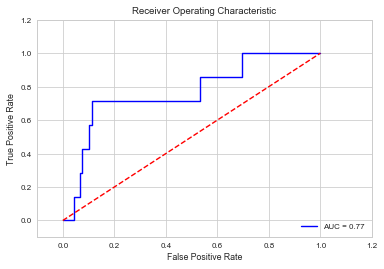

In [9]:
clf, x_train, y_train, X_test, y_test  = do_classify(LogisticRegression(), 
                                                           {"C": [0.01, 0.1, 1, 10, 100]}, 
                                                          cc_mean.iloc[:,0:-2], cc_mean.DxC_1)

BEST PARAMS {'C': 10}
             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98       165
        1.0       0.00      0.00      0.00         7

avg / total       0.92      0.96      0.94       172

Accuracy on training data: 0.99
Accuracy on test data:     0.96


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


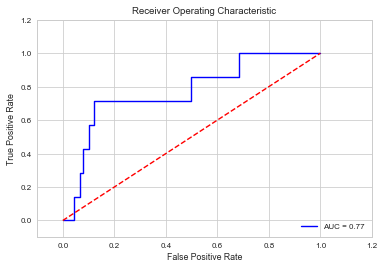

In [10]:
clf, x_train, y_train, X_test, y_test  = do_classify(LogisticRegression(), 
                                                           {"C": [0.01, 0.1, 1, 10, 100]}, 
                                                          cc_median.iloc[:,0:-2], cc_mean.DxC_1)

BEST PARAMS {'C': 10}
             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98       165
        1.0       0.00      0.00      0.00         7

avg / total       0.92      0.96      0.94       172

Accuracy on training data: 0.99
Accuracy on test data:     0.96


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


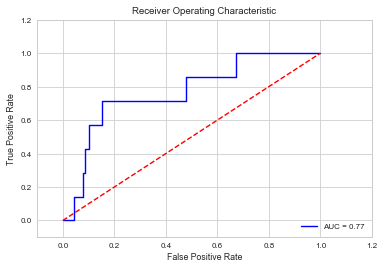

In [11]:
clf, x_train, y_train, X_test, y_test  = do_classify(LogisticRegression(), 
                                                           {"C": [0.01, 0.1, 1, 10, 100]}, 
                                                          cc_mode.iloc[:,0:-2], cc_mean.DxC_1)